In [1]:
import pickle

basedir = '/home/anton/Documents/Tulane/Research/PNC_Good/'
rest = pickle.load(open(f'{basedir}/PNC_SPM_rest.pkl', 'rb'))
nback = pickle.load(open(f'{basedir}/PNC_SPM_nback.pkl', 'rb'))
emoid = pickle.load(open(f'{basedir}/PNC_SPM_emoid.pkl', 'rb'))

print('Complete')

Complete


In [46]:
import numpy as np
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    normal_cutoff = [cutoff[0], cutoff[1]]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False, fs=fs)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tr = 3

rest_filt = dict()
nback_filt = dict()
emoid_filt = dict()

for inp,out in zip([rest, nback, emoid], [rest_filt, nback_filt, emoid_filt]):
    for sub in inp:
        filt = butter_bandpass_filter(inp[sub], [0.01, 0.15], 1/tr)
        p = np.corrcoef(filt)
        if np.sum(np.isnan(p)) > 0:
            print(f'Bad subject {sub}')
            continue
        out[sub] = filt
    print('Finished part')
    print(len(list(out.keys())))

Bad subject 601308609646
Bad subject 602818432787
Bad subject 603403163265
Bad subject 605300352682
Bad subject 605515760919
Bad subject 606447154458
Bad subject 607218468837
Finished part
1387
Bad subject 602818432787
Bad subject 603403163265
Finished part
1456
Finished part
1500


In [19]:
oldts = pickle.load(open('../../PNC_Good/PNC_PowerTS_float2.pkl', 'rb'))['emoid']
oldts_filt = {sub[4:]: butter_bandpass_filter(oldts[sub], [0.01, 0.15], 1/tr) for sub in oldts}

print('Complete')

Complete


/tmp/ipykernel_3804228/4051903734.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


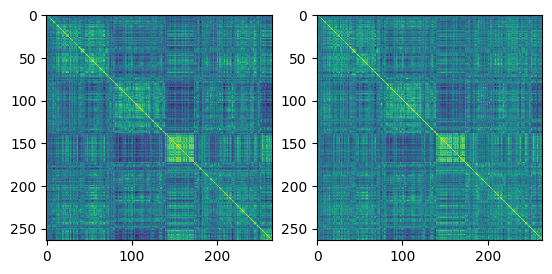

In [47]:
import matplotlib.pyplot as plt

n = 157

subs = list(emoid_filt.keys())
po = np.corrcoef(oldts_filt[subs[n]])
pn = np.corrcoef(emoid_filt[subs[n]])

fig, ax = plt.subplots(1,2)
ax[0].imshow(po)
ax[1].imshow(pn)
fig.show()

In [48]:
pickle.dump(rest_filt, open(f'{basedir}/PNC_SPM_rest_good_filt.pkl', 'wb'))
pickle.dump(nback_filt, open(f'{basedir}/PNC_SPM_nback_good_filt.pkl', 'wb'))
pickle.dump(emoid_filt, open(f'{basedir}/PNC_SPM_emoid_good_filt.pkl', 'wb'))

print('Complete')

Complete
